In [1]:
import os
import pandas as pd
import scipy.spatial as spatial

In [2]:
import sklearn
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.neighbors import KDTree
from scipy.spatial.distance import cdist


import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import random

import warnings
warnings.filterwarnings("ignore")

In [3]:
show_averages = pd.read_csv('../../output/combined_shows_features_with_urls_3.csv')

In [4]:
show_averages.head()

Url  acousticness  \
0  https://www.nts.live/shows/100-elements/episod...      0.431533   
1  https://www.nts.live/shows/100-elements/episod...      0.494785   
2  https://www.nts.live/shows/100-elements/episod...      0.397440   
3  https://www.nts.live/shows/100-elements/episod...      0.410600   
4  https://www.nts.live/shows/100-elements/episod...      0.281225   

   danceability                  date    energy          host  \
0      0.562267       2nd-april-2020/  0.639067  100-elements   
1      0.559739    6th-february-2020/  0.619522  100-elements   
2      0.535200     9th-january-2020/  0.599000  100-elements   
3      0.637250    17th-october-2019/  0.544500  100-elements   
4      0.647250  19th-september-2019/  0.752750  100-elements   

   instrumentalness       key  liveness  loudness      mode  speechiness  \
0          0.290534  5.800000  0.167433 -9.274200  0.533333     0.203100   
1          0.127049  5.826087  0.194104 -9.305522  0.695652     0.221513   
2          0.356700  6.600000  0.322260 -9.330000  0.200000     0.238320   
3          0.042503  6.250000  0.263400 -8.532750  0.750000     0.186475   
4          0.000046  4.000000  0.286500 -8.246000  0.750000     0.185950   

        tempo   valence  
0  116.255800  0.579067  
1  108.898826  0.595435  
2  106.872400  0.439400  
3   93.304000  0.583750  
4   98.632250  0.608500

In [5]:
show_averages.dropna(inplace=True)
drop_cols = ['date', 'host', 'Url']
show_average_data = show_averages.drop(drop_cols, axis=1)
#show_average_data = (show_average_data - show_average_data.mean()) / (show_average_data.max() - show_average_data.min())

In [6]:
show_average_data.head()

acousticness  danceability    energy  instrumentalness       key  liveness  \
0      0.431533      0.562267  0.639067          0.290534  5.800000  0.167433   
1      0.494785      0.559739  0.619522          0.127049  5.826087  0.194104   
2      0.397440      0.535200  0.599000          0.356700  6.600000  0.322260   
3      0.410600      0.637250  0.544500          0.042503  6.250000  0.263400   
4      0.281225      0.647250  0.752750          0.000046  4.000000  0.286500   

   loudness      mode  speechiness       tempo   valence  
0 -9.274200  0.533333     0.203100  116.255800  0.579067  
1 -9.305522  0.695652     0.221513  108.898826  0.595435  
2 -9.330000  0.200000     0.238320  106.872400  0.439400  
3 -8.532750  0.750000     0.186475   93.304000  0.583750  
4 -8.246000  0.750000     0.185950   98.632250  0.608500

Text(0.5, 1.0, 'acousticness vs speechiness')

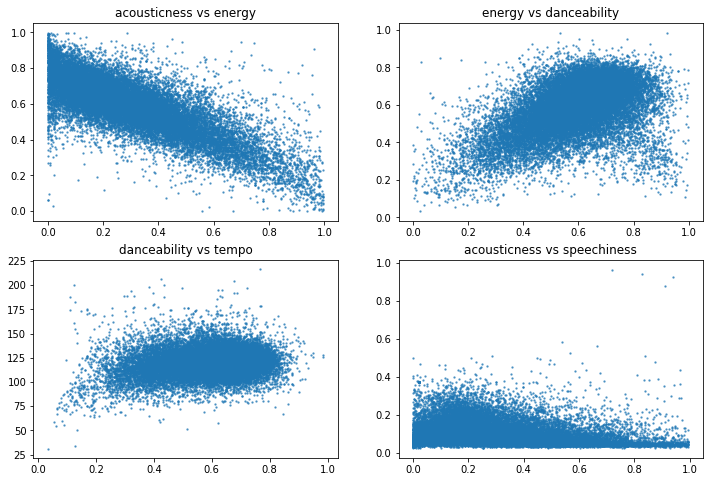

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
ax[0][0].scatter(show_average_data['acousticness'], show_average_data['energy'], s=2, alpha=0.6)
ax[0][0].set_title('acousticness vs energy')
ax[0][1].scatter(show_average_data['energy'], show_average_data['danceability'], s=2, alpha=0.6)
ax[0][1].set_title('energy vs danceability')
ax[1][0].scatter(show_average_data['danceability'], show_average_data['tempo'], s=2, alpha=0.6)
ax[1][0].set_title('danceability vs tempo')
ax[1][1].scatter(show_average_data['acousticness'], show_average_data['speechiness'], s=2, alpha=0.6)
ax[1][1].set_title('acousticness vs speechiness')

In [8]:
kmeans_model = KMeans(n_clusters=100, max_iter=10000).fit(show_average_data)

In [26]:
def plot_for_increasing_clusters(show_average_data, show_averages, x_variable='tempo', y_variable='loudness', starting_clusters=1):
    left = True
    right_index = 0
    left_index = 0
    fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(16,24))
    for i in range(8):
        n_clusters = 2**i
        kmeans_model = KMeans(n_clusters=n_clusters, max_iter=10000).fit(show_average_data)
        show_averages['cluster'] = kmeans_model.labels_
        cmap = 'hsv'
        ax[left_index][right_index].scatter(show_averages[x_variable], show_averages[y_variable], s=2, 
                c=show_averages['cluster'], cmap=cmap, alpha=0.8)
        ax[left_index][right_index].set_title(f'{n_clusters} clusters')
        ax[left_index][right_index].set_xlabel(x_variable)
        ax[left_index][right_index].set_ylabel(y_variable)
        if left:  
            right_index = 1
            left = False
        else:
            left_index += 1
            right_index = 0
            left = True
    plt.savefig(f'increasing_clusters_{x_variable}_vs_{y_variable}.png')

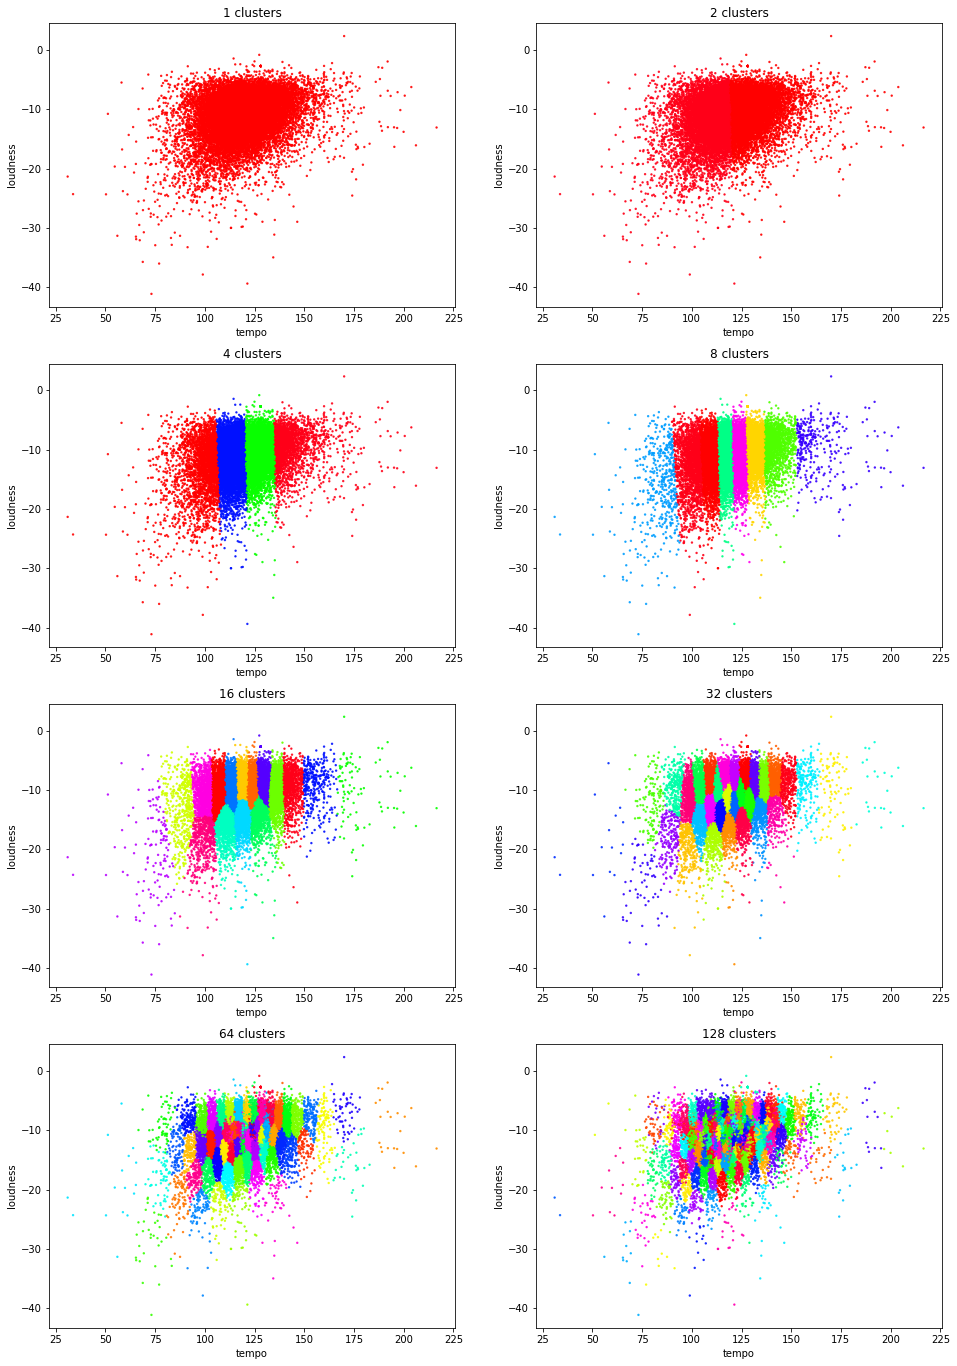

In [23]:
plot_for_increasing_clusters(show_average_data=show_average_data, show_averages=show_averages)

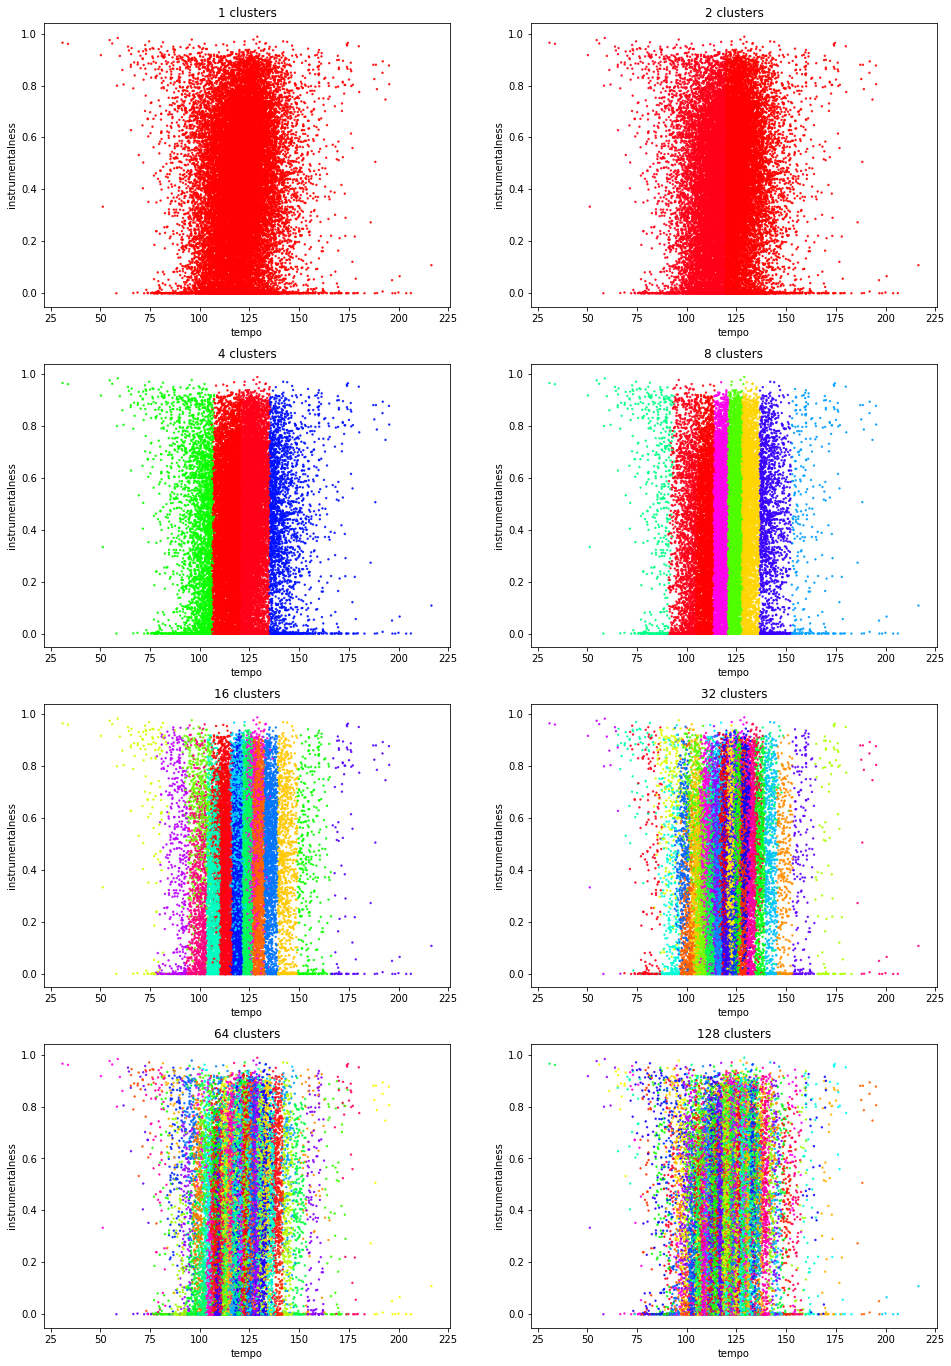

In [28]:
plot_for_increasing_clusters(show_average_data=show_average_data, show_averages=show_averages, x_variable='tempo', y_variable='instrumentalness')

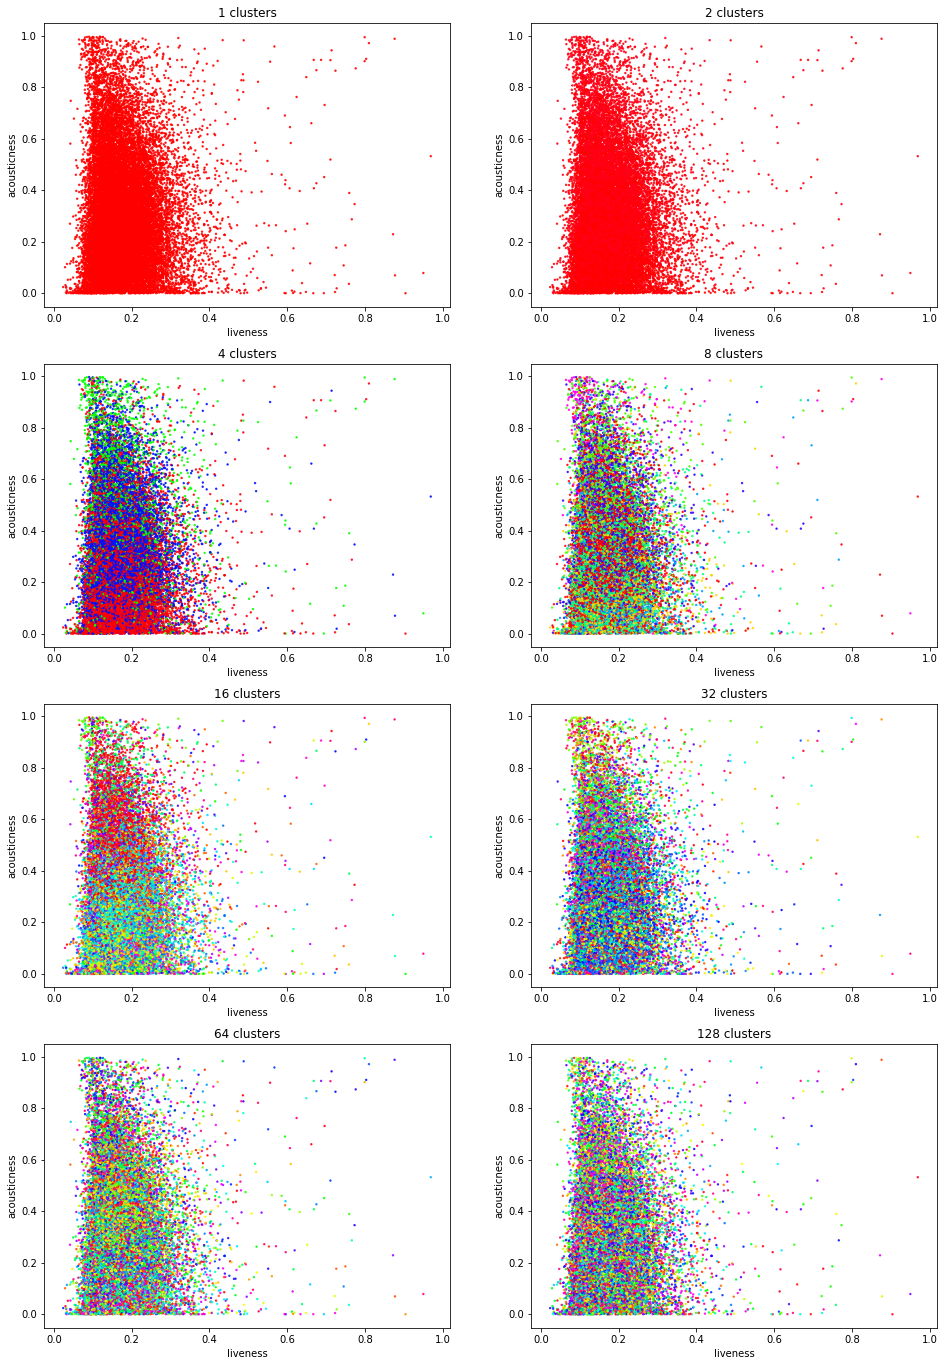

In [29]:
plot_for_increasing_clusters(show_average_data=show_average_data, show_averages=show_averages, x_variable='liveness', y_variable='acousticness')

In [9]:
centroids = kmeans_model.cluster_centers_

In [10]:
show_averages['cluster'] = kmeans_model.labels_

In [21]:
clusters = np.unique(kmeans_model.labels_)
index = np.random.choice(clusters.shape[0], 5, replace=False)   # select 5 random clusters
clustered_data = show_averages[show_averages['cluster'].isin(index)]

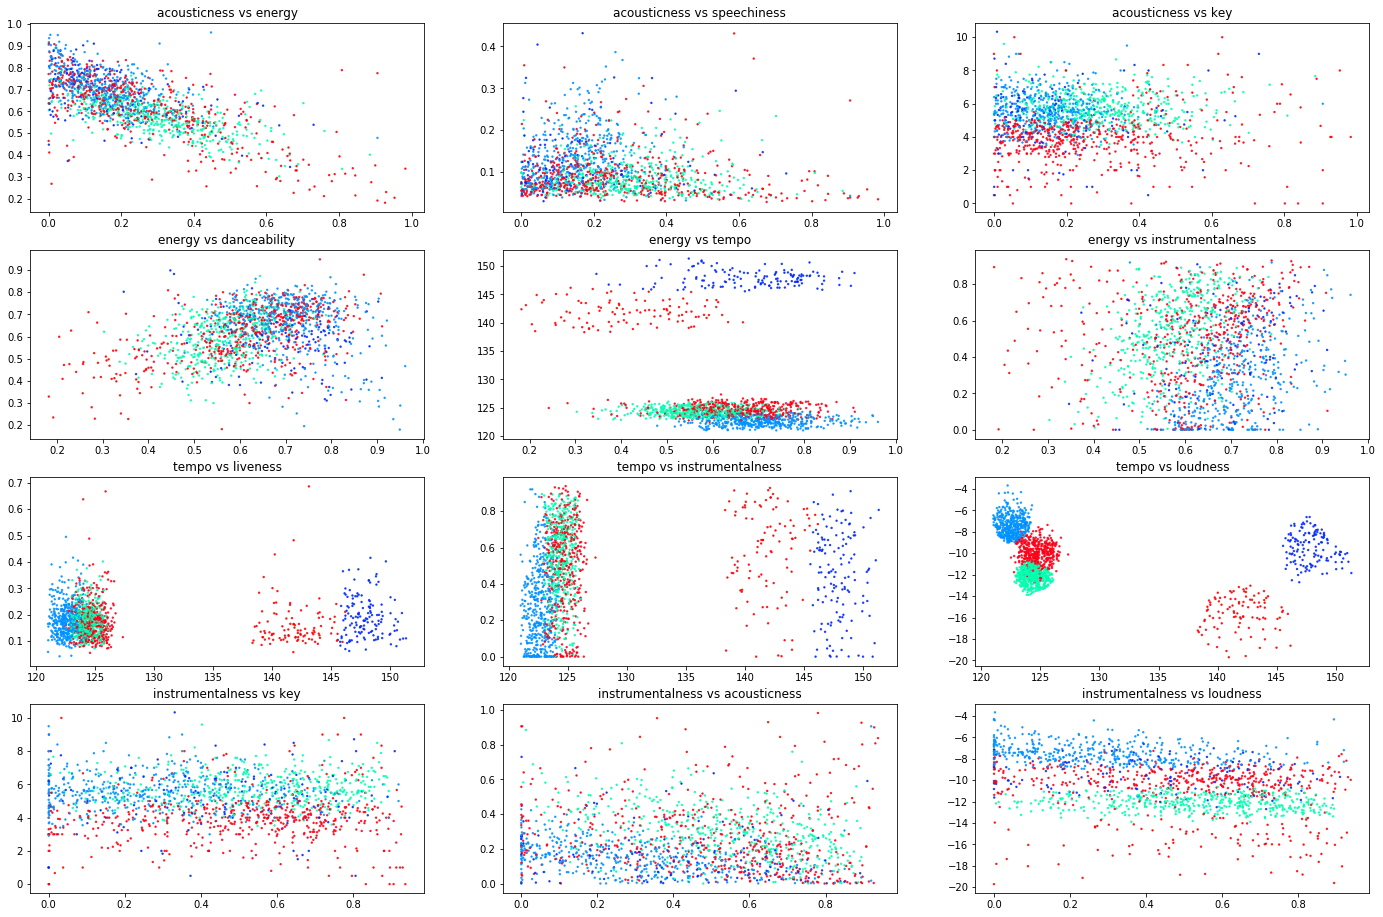

In [22]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(24,16))
cmap = 'hsv'
ax[0][0].scatter(clustered_data['acousticness'], clustered_data['energy'], s=2, 
            c=clustered_data['cluster'], cmap=cmap, alpha=0.8)
ax[0][0].set_title('acousticness vs energy')
ax[0][1].scatter(clustered_data['acousticness'], clustered_data['speechiness'], s=2, 
            c=clustered_data['cluster'], cmap=cmap, alpha=0.8)
ax[0][1].set_title('acousticness vs speechiness')
ax[0][2].scatter(clustered_data['acousticness'], clustered_data['key'], s=2, 
            c=clustered_data['cluster'], cmap=cmap, alpha=0.8)
ax[0][2].set_title('acousticness vs key')

ax[1][0].scatter(clustered_data['energy'], clustered_data['danceability'], s=2, 
            c=clustered_data['cluster'], cmap=cmap, alpha=0.8)
ax[1][0].set_title('energy vs danceability')
ax[1][1].scatter(clustered_data['energy'], clustered_data['tempo'], s=2, 
            c=clustered_data['cluster'], cmap=cmap, alpha=0.8)
ax[1][1].set_title('energy vs tempo')
ax[1][2].scatter(clustered_data['energy'], clustered_data['instrumentalness'], s=2, 
            c=clustered_data['cluster'], cmap=cmap, alpha=0.8)
ax[1][2].set_title('energy vs instrumentalness')


ax[2][0].scatter(clustered_data['tempo'], clustered_data['liveness'], s=2, 
            c=clustered_data['cluster'], cmap=cmap, alpha=0.8)
ax[2][0].set_title('tempo vs liveness')
ax[2][1].scatter(clustered_data['tempo'], clustered_data['instrumentalness'], s=2, 
            c=clustered_data['cluster'], cmap=cmap, alpha=0.8)
ax[2][1].set_title('tempo vs instrumentalness')
plt.savefig('clustered_regions_2.png')
ax[2][2].scatter(clustered_data['tempo'], clustered_data['loudness'], s=2, 
            c=clustered_data['cluster'], cmap=cmap, alpha=0.8)
ax[2][2].set_title('tempo vs loudness')

ax[3][0].scatter(clustered_data['instrumentalness'], clustered_data['key'], s=2, 
            c=clustered_data['cluster'], cmap=cmap, alpha=0.8)
ax[3][0].set_title('instrumentalness vs key')
ax[3][1].scatter(clustered_data['instrumentalness'], clustered_data['acousticness'], s=2, 
            c=clustered_data['cluster'], cmap=cmap, alpha=0.8)
ax[3][1].set_title('instrumentalness vs acousticness')
ax[3][2].scatter(clustered_data['instrumentalness'], clustered_data['loudness'], s=2, 
            c=clustered_data['cluster'], cmap=cmap, alpha=0.8)
ax[3][2].set_title('instrumentalness vs loudness')

plt.savefig('clustered_regions_7.png')

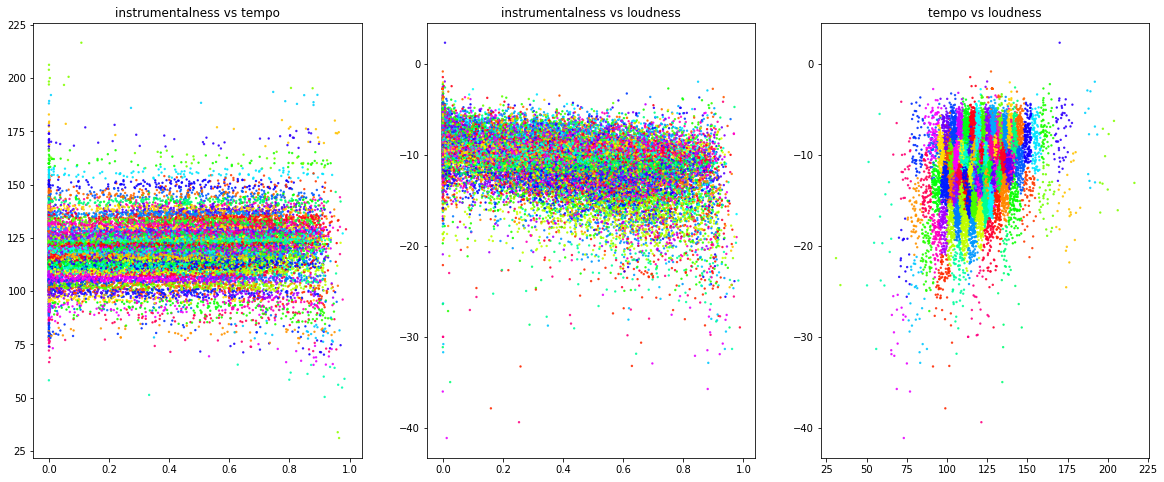

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,8))
ax[0].scatter(show_averages['instrumentalness'], show_averages['tempo'], s=2, 
            c=show_averages['cluster'], cmap='hsv', alpha=0.8)
ax[0].set_title('instrumentalness vs tempo')
ax[1].scatter(show_averages['instrumentalness'], show_averages['loudness'], s=2, 
            c=show_averages['cluster'], cmap='hsv', alpha=0.8)
ax[1].set_title('instrumentalness vs loudness')
ax[2].scatter(show_averages['tempo'], show_averages['loudness'], s=2, 
            c=show_averages['cluster'], cmap='hsv', alpha=0.8)
ax[2].set_title('tempo vs loudness')
plt.savefig('all_clusters_comparisons_6.png')

In [13]:
# Here, lets take an episode I like and find which cluster it belongs to. Then lets calculate a KDTree for that 
# particular cluster and find nearest neighbour shows.

# Alternatively, I could give it any 'row' of 11 dimensions (this could be a show, host or even just a single song),
# find the closest centroid to it and THEN do my KDTree. To start lets just do the above.

artist = 'four-tet'
show = 'https://www.nts.live/shows/four-tet/episodes/four-tet-24th-january-2020/'

show_of_interest = show_averages[(show_averages['Url'] == show)]
cluster_value = show_of_interest.cluster
cluster_rows = show_averages[show_averages['cluster'] == int(cluster_value)]

In [14]:
D = cdist(show_of_interest.drop(columns=['host', 'date', 'Url']), cluster_rows.drop(columns=['host', 'date', 'Url']))

In [15]:
tree = spatial.KDTree(cluster_rows.drop(columns=['host', 'date', 'Url']))

In [79]:
nearest_neighbours = tree.query(show_of_interest.drop(columns=['host', 'date', 'Url']), k=5)

In [85]:
def get_suggested_show(artist, show):
    show_of_interest = show_averages[(show_averages['Url'] == show)]
    cluster_value = show_of_interest.cluster
    cluster_rows = show_averages[show_averages['cluster'] == int(cluster_value)]
    D = cdist(show_of_interest.drop(columns=['host', 'date', 'Url']), cluster_rows.drop(columns=['host', 'date', 'Url']))
    tree = spatial.KDTree(cluster_rows.drop(columns=['host', 'date', 'Url']))
    nearest_neighbours = tree.query(show_of_interest.drop(columns=['host', 'date', 'Url']), k=5)
    print(f'\n\nYou enjoyed {artist} on {show}.')
    print('We think you might also enjoy:\n')
    nn_indexes = nearest_neighbours[1][0]
    for i in range(len(nn_indexes)):
        if nearest_neighbours[0][0][i] != 0:
            nearby_host = cluster_rows.iloc[nearest_neighbours[1][0][i]]['host']
            nearby_date = cluster_rows.iloc[nearest_neighbours[1][0][i]]['date']
            nearby_url = cluster_rows.iloc[nearest_neighbours[1][0][i]]['Url']
            print(f'    {nearby_host} episode {nearby_url}')
    print('\n\n')

In [86]:
artist = 'four-tet'
show = 'https://www.nts.live/shows/four-tet/episodes/four-tet-24th-january-2020/'
get_suggested_show(artist=artist, show=show)



You enjoyed four-tet on https://www.nts.live/shows/four-tet/episodes/four-tet-24th-january-2020/.
We think you might also enjoy:

    ross-allen episode https://www.nts.live/shows/ross-allen/episodes/ross-allen-1st-december-2016/
    vic-crezee episode https://www.nts.live/shows/vic-crezee/episodes/vic-crezee-4th-december-2017/
    golden-lab episode https://www.nts.live/shows/golden-lab/episodes/the-cosmic-principle-w-nick-mitchell-29th-october-2017/
    henry-wu episode https://www.nts.live/shows/henry-wu/episodes/black-focus-w-henry-wu-31th-august-2018/





In [87]:
artist = 'tiffany-calver'
show = 'https://www.nts.live/shows/tiffany-calver/episodes/tiffany-calver-19th-april-2017/'
get_suggested_show(artist=artist, show=show)



You enjoyed tiffany-calver on https://www.nts.live/shows/tiffany-calver/episodes/tiffany-calver-19th-april-2017/.
We think you might also enjoy:

    coucou-chlo%C3%A9 episode https://www.nts.live/shows/coucou-chloé/episodes/rules-9thmarch-2017/
    lily-mercer episode https://www.nts.live/shows/lily-mercer/episodes/lily-mercer-4th-october-2019/
    foreign-hour episode https://www.nts.live/shows/foreign-hour/episodes/forein-hour-w-kaili-20th-september-2018/
    ag episode https://www.nts.live/shows/ag/episodes/the-mm-show-13th-october-2016/





In [88]:
artist = 'world-in-flo-motion'
show = 'https://www.nts.live/shows/world-in-flo-motion/episodes/world-in-flo-motion-23rd-march-2020/'
get_suggested_show(artist=artist, show=show)



You enjoyed world-in-flo-motion on https://www.nts.live/shows/world-in-flo-motion/episodes/world-in-flo-motion-23rd-march-2020/.
We think you might also enjoy:

    baadnews episode https://www.nts.live/shows/baadnews/episodes/woodgrain-w-baadnews-19th-march-2018/
    fervent-moon episode https://www.nts.live/shows/fervent-moon/episodes/fervent-moon-14th-july-2014/
    mark-leckey episode https://www.nts.live/shows/mark-leckey/episodes/mark-leckey-24th-july-2018/
    nonsense episode https://www.nts.live/shows/nonsense/episodes/nonsense-24th-september-2017/





In [89]:
artist = 'do-you-breakfast-show'
show = 'https://www.nts.live/shows/the-do-you-breakfast-show/episodes/do-you-w-charlie-bones-20th-january-2020/'
get_suggested_show(artist=artist, show=show)



You enjoyed do-you-breakfast-show on https://www.nts.live/shows/the-do-you-breakfast-show/episodes/do-you-w-charlie-bones-20th-january-2020/.
We think you might also enjoy:

    architects episode https://www.nts.live/shows/architects/episodes/architects-w-bronte-jane-13th-april-2020/
    queen-kong episode https://www.nts.live/shows/queen-kong/episodes/queen-kong-20th-july-2018/
    we-are episode https://www.nts.live/shows/we-are/episodes/we-are-w-paul-camo-3rd-september-2014/
    amila episode https://www.nts.live/shows/amila/episodes/altered-soul-experiment-w-amila-21st-september-2017/



